In [49]:
import pandas as pd
import numpy as np

featureset_path = "../dataset/mlcourse-dota2-win-prediction/train_features.csv"
targetset_path = "../dataset/mlcourse-dota2-win-prediction/train_targets.csv"

In [50]:
df = pd.read_csv(featureset_path)
target = pd.read_csv(targetset_path)

print(df.columns)
print(target.columns)

Index(['match_id_hash', 'game_time', 'game_mode', 'lobby_type',
       'objectives_len', 'chat_len', 'r1_hero_id', 'r1_kills', 'r1_deaths',
       'r1_assists',
       ...
       'd5_stuns', 'd5_creeps_stacked', 'd5_camps_stacked', 'd5_rune_pickups',
       'd5_firstblood_claimed', 'd5_teamfight_participation',
       'd5_towers_killed', 'd5_roshans_killed', 'd5_obs_placed',
       'd5_sen_placed'],
      dtype='object', length=246)
Index(['match_id_hash', 'game_time', 'radiant_win', 'duration',
       'time_remaining', 'next_roshan_team'],
      dtype='object')


In [51]:
column_to_drop = ["lobby_type","chat_len","game_mode"] # "match_id_hash","objectives_len"

filter = "(game_mode == 2 or game_mode == 22) and game_time > 0" # 2 standard ranked or 22 captain mode

df = df.query(filter)

df = df.drop(labels=column_to_drop,axis=1)

print(df.shape)

(32153, 243)


In [52]:
tf_toreplace = ["r1_teamfight_participation", "r2_teamfight_participation","r3_teamfight_participation", "r4_teamfight_participation","r5_teamfight_participation","d1_teamfight_participation","d2_teamfight_participation","d3_teamfight_participation","d4_teamfight_participation",  "d5_teamfight_participation"]

for label in tf_toreplace:
    df.loc[df[label] > 1.0, label] = 1

a = df.loc[df["match_id_hash"] == "a400b8f29dece5f4d266f49f1ae2e98a"] #hash where nothing change = a400b8f29dece5f4d266f49f1ae2e98a ; hash where something change = 8e0ad8cbcf5a87c451e5e1e07596c443
print(a[tf_toreplace])

   r1_teamfight_participation  r2_teamfight_participation  \
0                         0.0                         0.0   

   r3_teamfight_participation  r4_teamfight_participation  \
0                         0.0                         0.0   

   r5_teamfight_participation  d1_teamfight_participation  \
0                         0.0                         1.0   

   d2_teamfight_participation  d3_teamfight_participation  \
0                         0.0                         0.0   

   d4_teamfight_participation  d5_teamfight_participation  
0                         1.0                         0.0  


In [53]:
target = target.loc[df.index]
print(target.shape)
df = df.drop('match_id_hash',axis=1)

(32153, 6)


In [54]:
print(df.shape)

(32153, 242)


In [55]:
features_toonehot = ["r1_hero_id","r2_hero_id","r3_hero_id","r4_hero_id","r5_hero_id","d1_hero_id","d2_hero_id","d3_hero_id","d4_hero_id","d5_hero_id"]
df = pd.get_dummies(df,columns=features_toonehot)
df.head()

,game_time,objectives_len,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,...,d5_hero_id_107,d5_hero_id_108,d5_hero_id_109,d5_hero_id_110,d5_hero_id_111,d5_hero_id_112,d5_hero_id_113,d5_hero_id_114,d5_hero_id_119,d5_hero_id_120
0,155,1,0,0,0,0,543,7,533,358,...,False,False,False,False,False,False,False,False,False,False
3,576,1,1,0,3,1,1613,0,1471,900,...,False,False,False,False,False,False,False,False,False,False
4,453,1,0,1,1,0,1404,9,1351,1000,...,False,False,False,False,False,False,False,False,False,False
5,160,0,0,0,0,1,403,0,359,740,...,False,False,False,False,False,False,False,False,False,False
6,1016,1,0,3,3,5,3085,1,2828,495,...,False,False,False,False,False,False,False,False,False,False


In [56]:
print(df.shape)

(32153, 1382)


In [57]:
win = target["radiant_win"].astype(int)
X = np.array(df.values)
Y = np.array(win)

print(X.shape)
print(Y.shape)

(32153, 1382)
(32153,)


In [58]:
from sklearn.model_selection import train_test_split

np.random.seed(seed=10)

X_train,X_test,Y_train,Y_test = train_test_split(df,win,test_size=0.2)

In [59]:
from sklearn.ensemble import RandomForestClassifier

feature_selector = RandomForestClassifier(max_depth=50, n_estimators=200)


feature_selector.fit(X_train,Y_train)

RandomForestClassifier(max_depth=50, n_estimators=200)

In [60]:
from sklearn.metrics import roc_auc_score, accuracy_score

Y_pred = feature_selector.predict(X_test)

acc = accuracy_score(Y_test,Y_pred)
auc = roc_auc_score(Y_test,Y_pred)

print("Accouracy ",acc)
print("Auc",auc)

feature_importance = {
    name: value 
    for name,value in zip(feature_selector.feature_names_in_,feature_selector.feature_importances_)
}

print(feature_importance)

feature_importance = dict(reversed(sorted(feature_importance.items(), key=lambda item: item[1])))
print(feature_importance)
feature_names = list(feature_importance.keys())[:10]
print(list(feature_importance.keys())[-100:])
print(feature_names)
print(list(feature_importance.keys()))

print(feature_importance["objectives_len"])

Accouracy  0.708287980096408
Auc 0.7042119359205689
{'game_time': 0.004857296488768491, 'objectives_len': 0.0028046770568329843, 'r1_kills': 0.0033345710676776414, 'r1_deaths': 0.004637607068040343, 'r1_assists': 0.0037948970758000643, 'r1_denies': 0.0038163815251295286, 'r1_gold': 0.006346322698026899, 'r1_lh': 0.004597229759677797, 'r1_xp': 0.005735418936910883, 'r1_health': 0.005334083206417155, 'r1_max_health': 0.005047097848123516, 'r1_max_mana': 0.00509068966381752, 'r1_level': 0.0030215204793042436, 'r1_x': 0.009091141819980025, 'r1_y': 0.00998176889697857, 'r1_stuns': 0.003360505300565977, 'r1_creeps_stacked': 0.0010953447488620427, 'r1_camps_stacked': 0.0008067603991129542, 'r1_rune_pickups': 0.003403096066928346, 'r1_firstblood_claimed': 0.0004444542461480148, 'r1_teamfight_participation': 0.004149254776694589, 'r1_towers_killed': 0.0014060275031280048, 'r1_roshans_killed': 0.00015711280329551636, 'r1_obs_placed': 0.001735305975451936, 'r1_sen_placed': 0.0012316821853082104, 

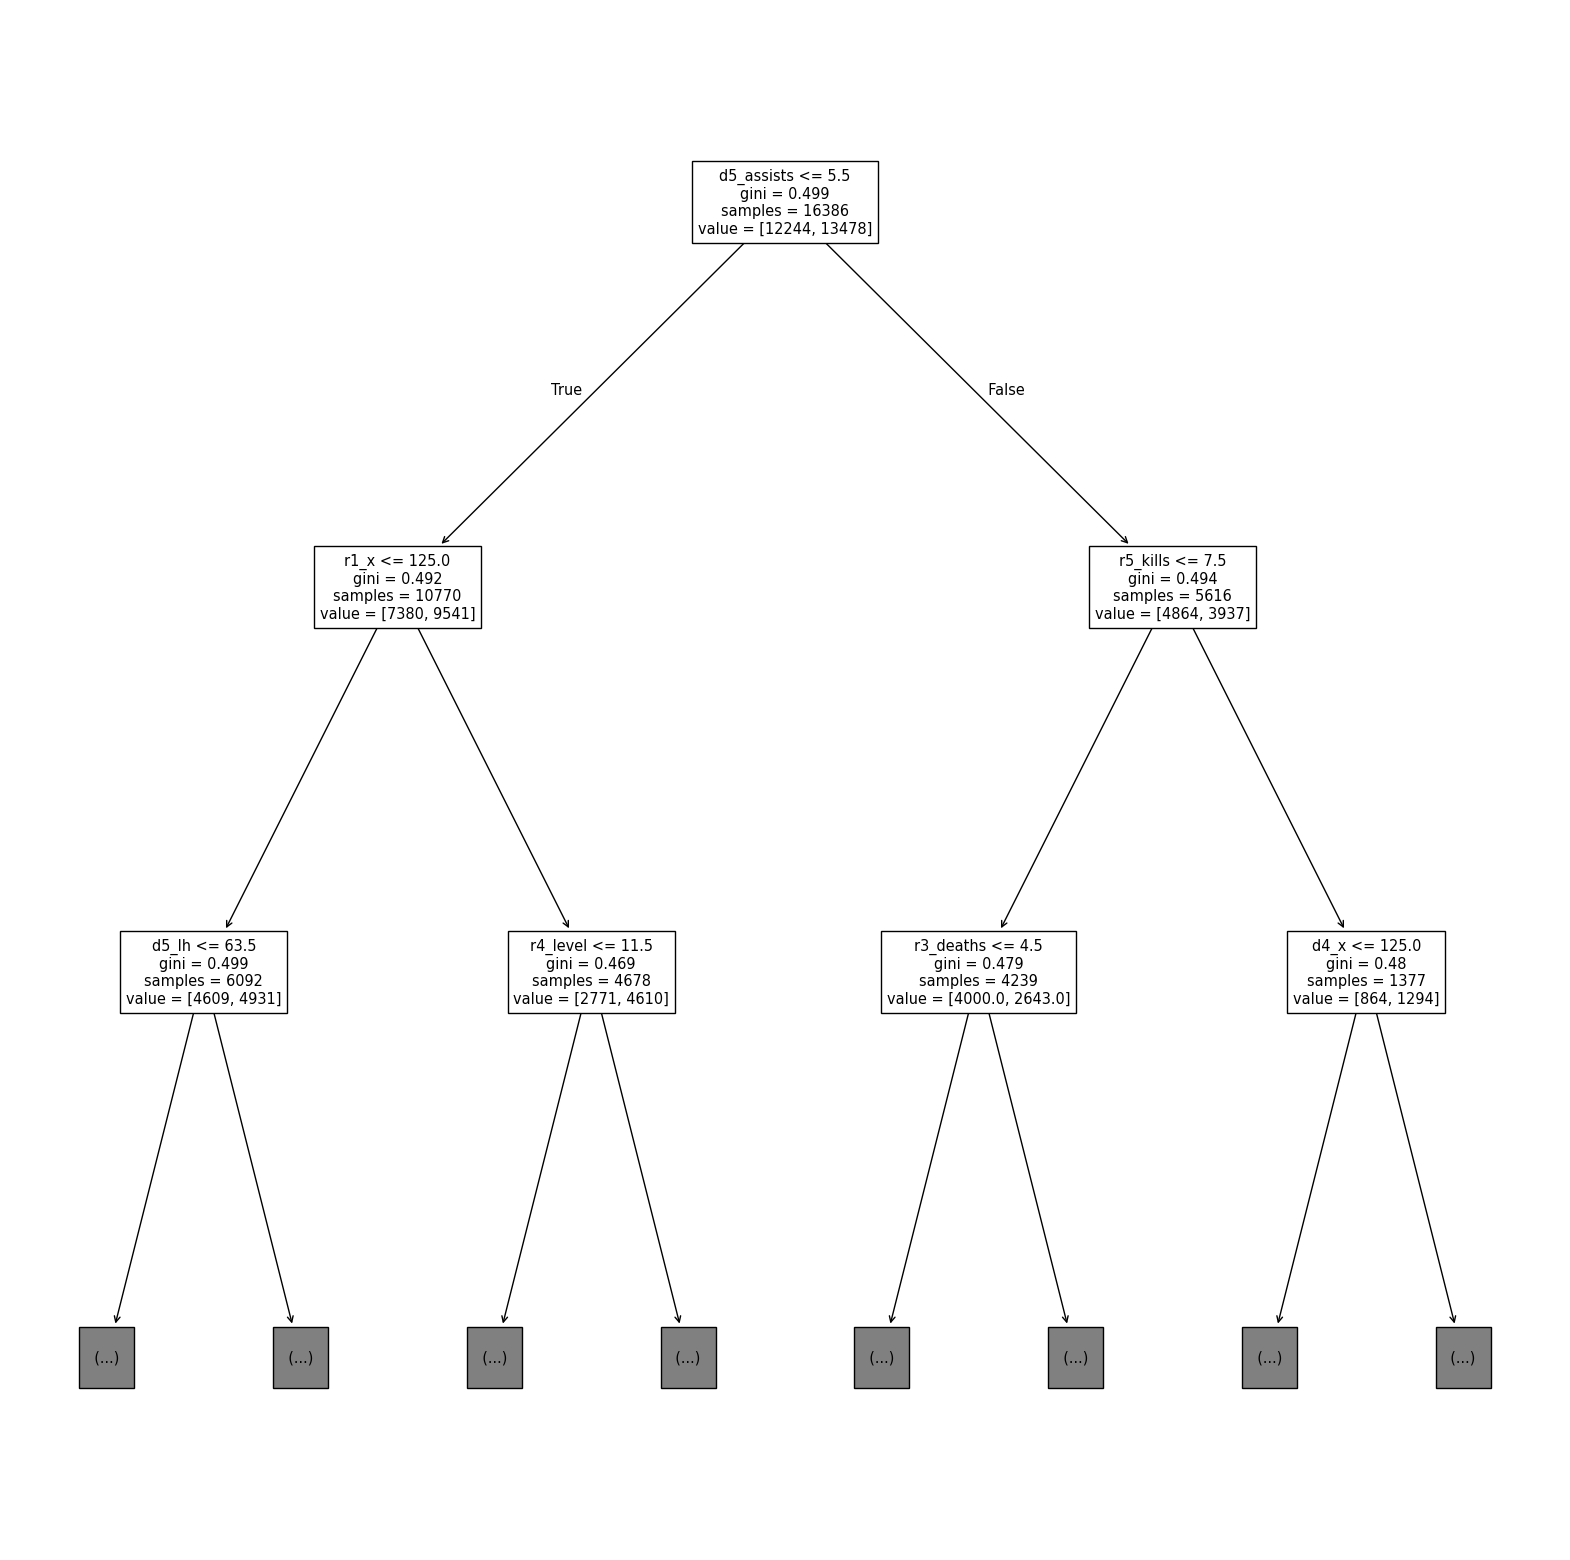

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = feature_selector.estimators_[3]

plt.figure(figsize=(20,20))
plot_tree(tree,max_depth=2,feature_names=df.columns)
plt.show()